# Employee Churn Prediction

Прогноз оттока сотрудников

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [18]:
# установка plotly
pip install plotly

Note: you may need to restart the kernel to use updated packages.


## Введение

Целью данного исследования является создание модели, которая будет прогнозировать вероятность того, что работник останется в компании или покинет ее, на основе некоторых его или ее характеристик (особенностей). Особенности приведены в кодовой книге.

Поскольку переменная ответа является дихотомической категориальной переменной, для прогнозирования результата будут использоваться три модели: линейный дискриминантный анализ (LDA), логистическая регрессия и классификатор случайного леса, а затем производительность этих моделей будет сравниваться.

### Codebook
1. `satisfaction_level` - Уровень удовлетворенности сотрудников
1. `Last_evaluation` - Последняя оценочная оценка
1. `number_projects` - Количество проектов, назначенных
1. `average_monthly_hours` - Среднее количество отработанных часов в месяц
1. `time_spend_company` - Время, проведенное в компании
1. `work_accident` - Был ли у них несчастный случай на работе
1. `left` - Покинул ли сотрудник компанию
1. `promotion_last_5years` - Было ли у них продвижение по службе за последние 5 лет
1. `department` - Название отдела
1. `salary` - Зарплатная категория

## EDA и предварительная обработка данных

### Загрузка и проверка данных

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
df.rename(columns={'sales': 'department'}, inplace=True)

In [12]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# отсутствующие значения для каждого элемента
np.round(df.isna().sum()/len(df), 2)

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
sales                    0.0
salary                   0.0
dtype: float64

**Заключение**. Этот набор данных содержит 9 признаков и целевую пременную с информацией о 14 999 сотрудниках. В этом наборе данных нет пропущенных значений.

### Категориальные признаки

#### Work_accident (Несчастный случай на производстве)

In [5]:
# Work_accident (Несчастный случай на производстве) vs. left (Покинувших) в процентах
outcome_Work_accident = pd.crosstab(index = df['left'],
                                    columns = df['Work_accident'], 
                                    normalize = 'index') # percentages based on index

outcome_Work_accident.index= ['Did not leave', 'Left']
outcome_Work_accident

Work_accident,0,1
Did not leave,0.824991,0.175009
Left,0.952674,0.047326


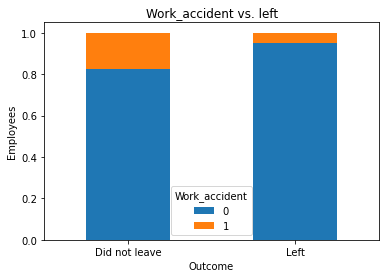

In [6]:
outcome_Work_accident.plot(kind = 'bar', stacked = True)

plt.title('Work_accident vs. left')
plt.xlabel('Outcome')
plt.ylabel('Employees')
plt.xticks(rotation = 0, horizontalalignment = 'center')

plt.show()

Меньше несчастных случаев среди покинувших компанию.

#### promotion_last_5years (Продвижение за последние 5 лет)

In [8]:
# promotion_last_5years (Продвижение за последние 5 лет) vs. left (Покинувших) в процентах
outcome_promotion_last_5years = pd.crosstab(index = df['left'], 
                           columns = df['promotion_last_5years'], normalize = 'index')

outcome_promotion_last_5years.index= ['Did not leave', 'Left']
outcome_promotion_last_5years

promotion_last_5years,0,1
Did not leave,0.973749,0.026251
Left,0.994679,0.005321


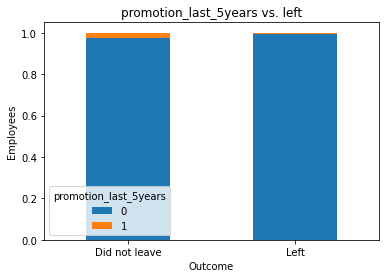

In [9]:
outcome_promotion_last_5years.plot(kind = 'bar', stacked = True)

plt.title('promotion_last_5years vs. left')
plt.xlabel('Outcome')
plt.ylabel('Employees')
plt.xticks(rotation = 0, horizontalalignment = 'center')

plt.show()

Практически никакого продвижения среди ушедших.

#### department (Отделы компании)

In [13]:
# department vs. left (Покинувших) в процентах
outcome_department = pd.crosstab(index = df['left'],
                                 columns = df['department'],
                                 normalize = 'index')

outcome_department.index= ['Did not leave', 'Left']
outcome_department

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
Did not leave,0.083479,0.058278,0.049265,0.045852,0.047165,0.057315,0.061603,0.273539,0.146482,0.177021
Left,0.076449,0.033884,0.057127,0.060207,0.025483,0.056847,0.055447,0.283954,0.155419,0.195183


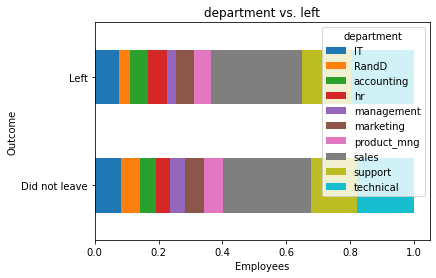

In [14]:
outcome_department.plot.barh(stacked = True)

plt.title('department vs. left')
plt.xlabel('Employees')
plt.ylabel('Outcome')
plt.xticks(rotation = 0, horizontalalignment = 'center')
plt.show()

In [15]:
# количество сотрудников по отделам
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

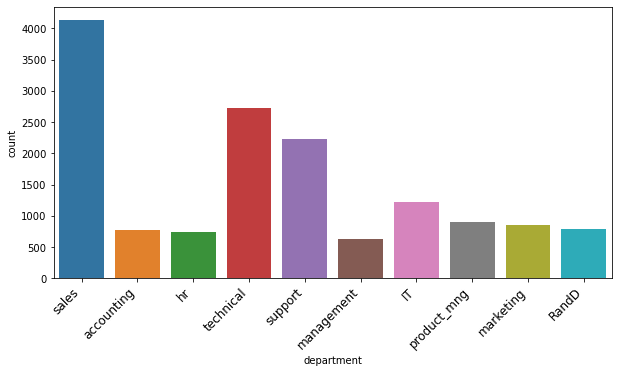

In [19]:
plt.figure(figsize = (10,5))

chart = sns.countplot(data = df, x = 'department')

chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation = 45, 
    horizontalalignment = 'right',
    fontweight = 'light',
    fontsize = 'large'
)

plt.show()

Большинство людей работают в отделах продаж, технической поддержки и поддержки. В разбивке по отделам примерно одинаковое распределение среди уехавших и не уехавших.

#### salary (Зарплата)

In [21]:
# salary counts
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

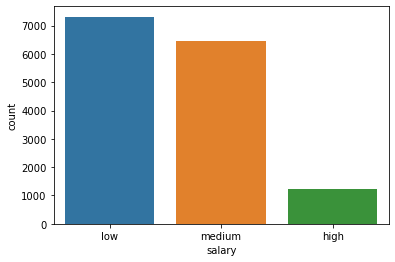

In [22]:
sns.countplot(x = 'salary',  data = df)
plt.show()

In [24]:
# salary vs. department в процентах
salary_dept = pd.crosstab(index = df['department'],
                          columns = df['salary'],
                          normalize='index')

salary_dept

salary,high,low,medium
department,,,
IT,0.067645,0.496333,0.436023
RandD,0.064803,0.462516,0.472681
accounting,0.096480,0.466754,0.436767
hr,0.060893,0.453315,0.485792
management,0.357143,0.285714,0.357143
marketing,0.093240,0.468531,0.438228
product_mng,0.075388,0.500000,0.424612
sales,0.064976,0.507005,0.428019
support,0.063257,0.514132,0.422611


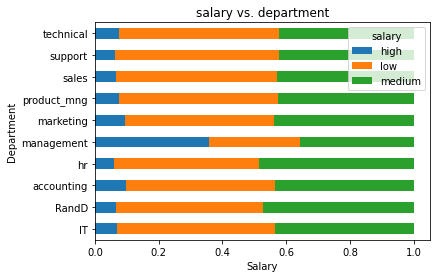

In [25]:
salary_dept.plot.barh(stacked = True)

plt.title('salary vs. department')
plt.xlabel('Salary')
plt.ylabel('Department')
plt.xticks(rotation = 0, horizontalalignment = 'center')

plt.show()

In [26]:
# salary vs. left в процентах
outcome_salary = pd.crosstab(index = df['left'],
                             columns = df['salary'],
                             normalize = 'index')

outcome_salary.index= ['Did not leave', 'Left']
outcome_salary

salary,high,low,medium
Did not leave,0.101068,0.450123,0.448810
Left,0.022963,0.608233,0.368804


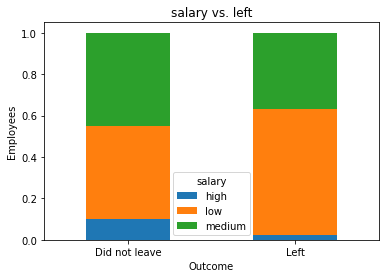

In [27]:
outcome_salary.plot(kind = 'bar', stacked = True)

plt.title('salary vs. left')
plt.xlabel('Outcome')
plt.ylabel('Employees')
plt.xticks(rotation = 0, horizontalalignment = 'center')

plt.show()

Работников с низкой и средней зарплатой значительно больше, чем высокооплачиваемых. Более или менее равномерное распределение заработной платы по отделам, за исключением менеджеров, у которых большая доля высоких окладов. Меньше уходят людей с высокой и средней зарплатой.

#### Time spent in the company (Время, проведенное в компании )

In [28]:
# time_spend_company vs. left в процентах
outcome_time_spend_company = pd.crosstab(index = df['left'],
                                         columns = df['time_spend_company'],
                                         normalize = 'index')

outcome_time_spend_company.index = ['Did not leave', 'Left']
outcome_time_spend_company

time_spend_company,2,3,4,5,6,7,8,10
Did not leave,0.279226,0.425009,0.14587,0.056003,0.044540,0.016451,0.014176,0.018726
Left,0.014842,0.444133,0.24923,0.233268,0.058527,0.000000,0.000000,0.000000


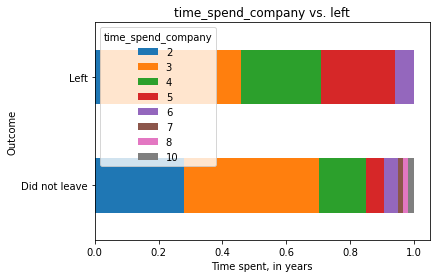

In [29]:
outcome_time_spend_company.plot.barh(stacked = True)

plt.title('time_spend_company vs. left')
plt.xlabel('Time spent, in years')
plt.ylabel('Outcome')

plt.show()

Те, кто работает по 2, 7, 8 и 9 лет, почти всегда остаются.

#### Number of projects (Количество проектов)

In [30]:
# mean number_project vs. left
proj_left = df.groupby('left').number_project.mean()
proj_left

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

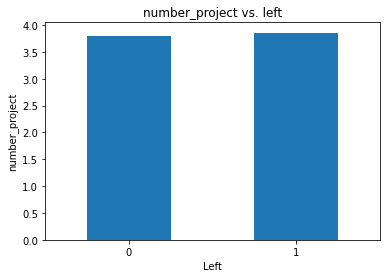

In [31]:
proj_left.plot(kind = 'bar', stacked = True)

plt.title('number_project vs. left')
plt.xlabel('Left')
plt.ylabel('number_project')
plt.xticks(rotation = 0, horizontalalignment = 'center')

plt.show()

Гистограмма среднего числа проектов не очень информативна.

In [32]:
# number_project vs. left в процентах
outcome_number_project = pd.crosstab(index = df['left'],
                                     columns = df['number_project'],
                                     normalize='index')

outcome_number_project.index = ['Did not leave', 'Left']
outcome_number_project

number_project,2,3,4,5,6,7
Did not leave,0.071841,0.348530,0.346167,0.188047,0.045415,0.000000
Left,0.438813,0.020162,0.114534,0.171381,0.183422,0.071689


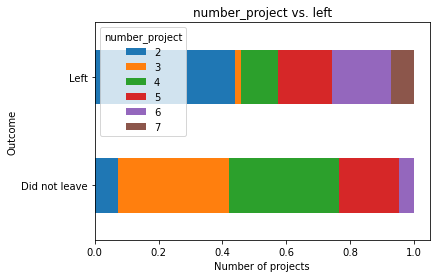

In [33]:
outcome_number_project.plot.barh(stacked = True)

plt.title('number_project vs. left')
plt.xlabel('Number of projects')
plt.ylabel('Outcome')

plt.show()

- Сотрудники с двумя проектами увольняются чаще
- Те, у кого 3 проекта, почти никогда не уходят
- Те, у кого 4 проекта, остаются чаще
- Уходят те, у кого 7 проектов

**Заключение для категориальных переменных:** среди категориальных переменных `promotion_last_5years`, `salary`, `time_spend_company`, `number_project` могут стать хорошими предикторами для модели. Интересно отметить, что люди, у которых было больше несчастных случаев на производстве, как правило, чаще остаются.

### Числовые признаки

#### Сводная статистика

In [34]:
df[['satisfaction_level', 'last_evaluation', 'average_montly_hours']].describe()

,satisfaction_level,last_evaluation,average_montly_hours
count,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,201.050337
std,0.248631,0.171169,49.943099
min,0.090000,0.360000,96.000000
25%,0.440000,0.560000,156.000000
50%,0.640000,0.720000,200.000000
75%,0.820000,0.870000,245.000000
max,1.000000,1.000000,310.000000


Среднее и медиана довольно близки. Похоже, что в распределениях нет значительного перекоса или выбросов.

#### Satisfaction level (Уровень удовлетворенности)

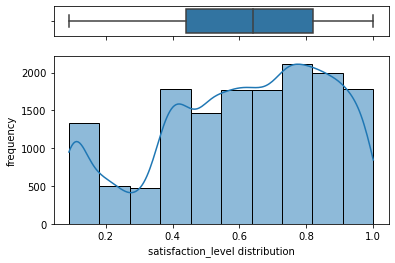

In [35]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios': (.15, .85)})

sns.boxplot(x = df['satisfaction_level'], ax = ax_box)
sns.histplot(x = df['satisfaction_level'], ax = ax_hist, bins = 10, kde = True)

ax_box.set(xlabel = '')
ax_hist.set(xlabel = 'satisfaction_level distribution')
ax_hist.set(ylabel = 'frequency')

plt.show()

Довольно много недовольных сотрудников.

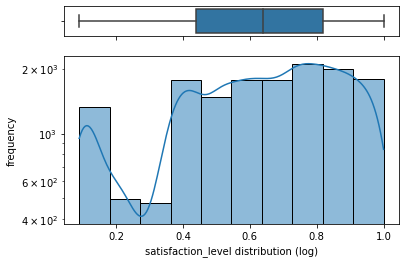

In [36]:
# пытаемся преобразовать log
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios': (.15, .85)})

sns.boxplot(x = df['satisfaction_level'], ax = ax_box)
sns.histplot(x = df['satisfaction_level'], ax = ax_hist, bins = 10, kde = True).set_yscale('log')

ax_box.set(xlabel = '')
ax_hist.set(xlabel = 'satisfaction_level distribution (log)')
ax_hist.set(ylabel = 'frequency')

plt.show()

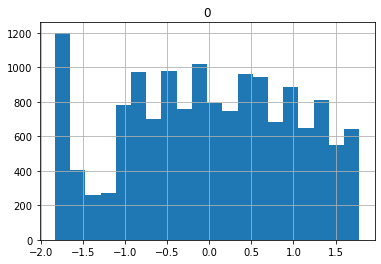

In [37]:
# trying Yeo-Johnson transformation
from sklearn.preprocessing import PowerTransformer

power = PowerTransformer(method = 'yeo-johnson', standardize = True)
sat_trans = power.fit_transform(df[['satisfaction_level']])
sat_trans = pd.DataFrame(sat_trans)
sat_trans.hist(bins = 20)

plt.show()

In [38]:
# satisfaction level vs. left
sat_left = df.groupby('left').satisfaction_level.mean()
sat_left

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

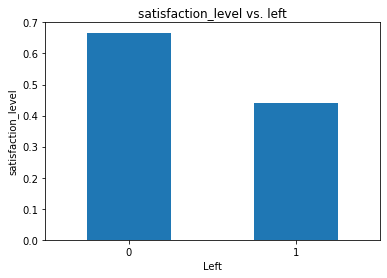

In [39]:
sat_left.plot(kind = 'bar', stacked = True)

plt.title('satisfaction_level vs. left')
plt.xlabel('Left')
plt.ylabel('satisfaction_level')
plt.xticks(rotation = 0, horizontalalignment = 'center')

plt.show()

Те, кто покинули компанию, удовлетворены значительно меньше.

In [40]:
# satisfaction level by department
sat_dept = df.groupby('department').satisfaction_level.mean().sort_values()
sat_dept

department
accounting     0.582151
hr             0.598809
technical      0.607897
sales          0.614447
IT             0.618142
support        0.618300
marketing      0.618601
product_mng    0.619634
RandD          0.619822
management     0.621349
Name: satisfaction_level, dtype: float64

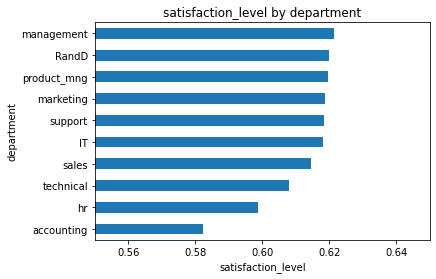

In [41]:
sat_dept.plot.barh(stacked = True)
plt.title('satisfaction_level by department')
plt.xlabel('satisfaction_level')
plt.ylabel('department')
plt.xticks(rotation = 0, horizontalalignment = 'center')
plt.xlim(0.55, 0.65)
plt.show()

Бухгалтеры, HR и технические специалисты явно менее удовлетворены.

#### Last evaluation (Последняя оценка)

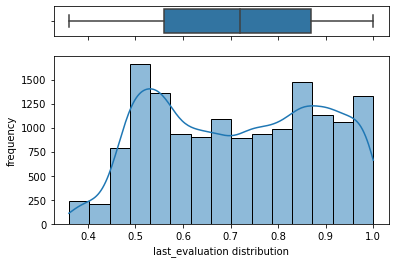

In [42]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios': (.15, .85)})

sns.boxplot(x = df['last_evaluation'], ax = ax_box)
sns.histplot(x = df['last_evaluation'], ax = ax_hist, bins = 15, kde = True)

ax_box.set(xlabel = '')
ax_hist.set(xlabel = 'last_evaluation distribution')
ax_hist.set(ylabel = 'frequency')

plt.show()

Бимодальное распределение.

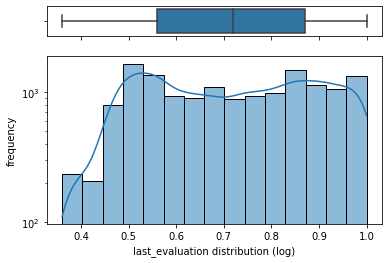

In [43]:
# trying log transformation
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios': (.15, .85)})

sns.boxplot(x = df['last_evaluation'], ax = ax_box)
sns.histplot(x = df['last_evaluation'], ax = ax_hist, bins = 15, kde = True).set_yscale('log')

ax_box.set(xlabel = '')
ax_hist.set(xlabel = 'last_evaluation distribution (log)')
ax_hist.set(ylabel = 'frequency')

plt.show()

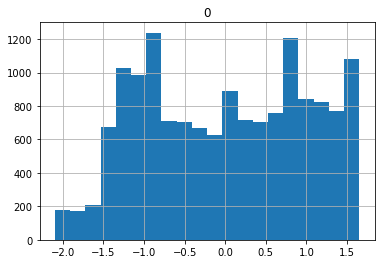

In [44]:
# trying Yeo-Johnson transformation
power = PowerTransformer(method = 'yeo-johnson', standardize = True)

eval_trans = power.fit_transform(df[['last_evaluation']])
eval_trans = pd.DataFrame(eval_trans)
eval_trans.hist(bins = 20)

plt.show()

In [45]:
# last_evaluation vs. left
eval_left = df.groupby('left').last_evaluation.mean()
eval_left

left
0    0.715473
1    0.718113
Name: last_evaluation, dtype: float64

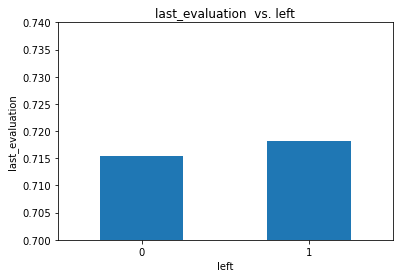

In [46]:
eval_left.plot(kind = 'bar', stacked = True)

plt.title('last_evaluation  vs. left')
plt.xlabel('left')
plt.ylabel('last_evaluation')
plt.xticks(rotation = 0, horizontalalignment = 'center')
plt.ylim(0.7, 0.74)

plt.show()

Разница крайне мала.

#### Average monthly hours (Среднее количество часов в месяц )

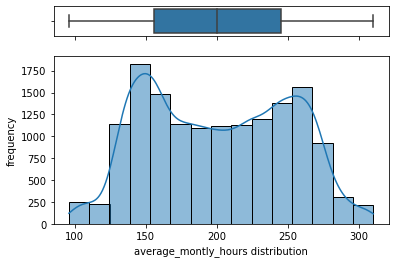

In [47]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios': (.15, .85)})

sns.boxplot(x = df['average_montly_hours'], ax = ax_box)
sns.histplot(x = df['average_montly_hours'], ax = ax_hist, bins = 15, kde = True)

ax_box.set(xlabel = '')
ax_hist.set(xlabel = 'average_montly_hours distribution')
ax_hist.set(ylabel = 'frequency')

plt.show()

Бимодальное распределение.

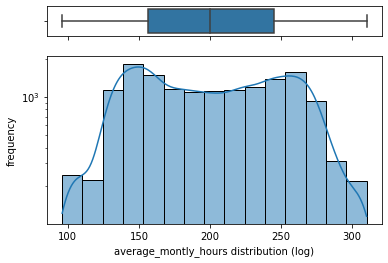

In [49]:
# trying log transformation
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios': (.15, .85)})

sns.boxplot(x = df['average_montly_hours'], ax = ax_box)
sns.histplot(x = df['average_montly_hours'], ax = ax_hist, bins = 15, kde = True).set_yscale('log')

ax_box.set(xlabel = '')
ax_hist.set(xlabel = 'average_montly_hours distribution (log)')
ax_hist.set(ylabel = 'frequency')

plt.show()

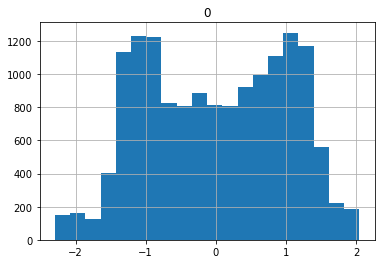

In [50]:
# trying Yeo-Johnson transformation
power = PowerTransformer(method = 'yeo-johnson', standardize = True)

hours_trans = power.fit_transform(df[['average_montly_hours']])
hours_trans = pd.DataFrame(hours_trans)
hours_trans.hist(bins = 20)

plt.show()

In [51]:
# average_montly_hours vs. left
hours_left = df.groupby('left').average_montly_hours.mean()
hours_left

left
0    199.060203
1    207.419210
Name: average_montly_hours, dtype: float64

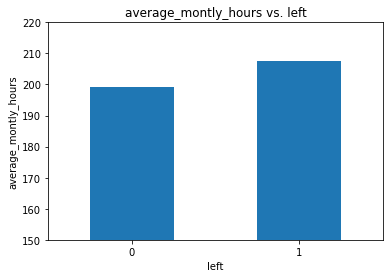

In [52]:
hours_left.plot(kind = 'bar', stacked = True)

plt.title('average_montly_hours vs. left')
plt.xlabel('left')
plt.ylabel('average_montly_hours')
plt.xticks(rotation = 0, horizontalalignment = 'center')
plt.ylim(150, 220)

plt.show()

**Вывод для числовых переменных:** Числовые переменные требуют логарифмического преобразования для лучшего прогнозирования. Преобразование Йео-Джонсона не дало хороших результатов. `satisfaction_level` и `average_montly_hours` вполне может быть использован в модели.

#### Выбросы

In [53]:
# satisfaction_level outliers
q1 = df.satisfaction_level.quantile(0.25)
q3 = df.satisfaction_level.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)

outliers_sat = df[(df.satisfaction_level < lower_bound) | (df.satisfaction_level > upper_bound)]
outliers_sat.head()

-0.12999999999999995 1.39


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary


Выбросов нет, поскольку границы превышают минимальное и максимальное значения.

In [ ]:
# last_evaluation outliers
q1 = df.last_evaluation.quantile(0.25)
q3 = df.last_evaluation.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)

eval = df[(df.last_evaluation < lower_bound) | (df.last_evaluation > upper_bound)]
eval.head()

0.09500000000000014 1.335


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary


Выбросов нет, поскольку границы превышают минимальное и максимальное значения.

In [ ]:
# average_montly_hours outliers
q1 = df.average_montly_hours.quantile(0.25)
q3 = df.average_montly_hours.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)

hours = df[(df.average_montly_hours < lower_bound) | (df.average_montly_hours > upper_bound)]
hours.head()

22.5 378.5


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary


Выбросов нет, поскольку границы превышают минимальное и максимальное значения.

### Исследование данных

#### Гипотеза 1

Мы проверим гипотезу о том, что люди с высоким `salary` имеют более высокий `average_montly_hours`.

In [54]:
# looking at the means
sal_hours = df.groupby('salary').average_montly_hours.mean().sort_values()
sal_hours

salary
high      199.867421
low       200.996583
medium    201.338349
Name: average_montly_hours, dtype: float64

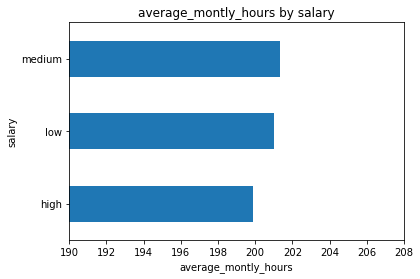

In [55]:
sal_hours.plot.barh(stacked = True)

plt.title('average_montly_hours by salary')
plt.xlabel('average_montly_hours')
plt.ylabel('salary')
plt.xticks(rotation = 0, horizontalalignment = 'center')
plt.xlim(190, 208)

plt.show()

На самом деле те, у кого средняя зарплата, похоже, работают немного дольше, разница хоть и невелика. Мы можем проверить, есть ли статистически значимая разница с помощью ANOVA.

In [56]:
# splitting data into three samples
low = df[df['salary'] == 'low']
low = low[['average_montly_hours']]

medium = df[df['salary'] == 'medium']
medium = medium[['average_montly_hours']]

high = df[df['salary'] == 'high']
high = high[['average_montly_hours']]

In [57]:
# size of each sample
print(len(low), len(medium), len(high))

7316 6446 1237


In [58]:
from scipy.stats import f_oneway
f_oneway(low, medium, high)

F_onewayResult(statistic=array([0.45836244]), pvalue=array([0.63232712]))

Размер выборки довольно значителен, поэтому мы ожидаем, что тест обнаружит даже небольшие различия. Тем не менее, p-значение по-прежнему превышает 0,05, и, таким образом, дисперсионный анализ показывает, что между ними нет существенной разницы с `average_montly_hours` точки зрения заработной платы `salary`.

### Преобразование данных 

In [59]:
# основное предположение для LDA заключается в том, что числовые переменные должны быть нормальными
# log преобразование числовых переменных
df['sat_level_log'] = np.log(df['satisfaction_level'])
df['last_eval_log'] = np.log(df['last_evaluation'])
df['av_hours_log'] = np.log(df['average_montly_hours'])

# изменение порядка столбцов
columnsTitles = ['satisfaction_level', 'sat_level_log', 'last_evaluation', 'last_eval_log', 'number_project', 'average_montly_hours', 'av_hours_log', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department', 'salary', 'left']
df = df.reindex(columns = columnsTitles)

In [60]:
# преобразование категории 'salary' в 'int'
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df['salary'] = labelencoder.fit_transform(df['salary'])

In [61]:
# преобразование категории 'deparment' в 'int'
labelencoder = LabelEncoder()
df['department'] = labelencoder.fit_transform(df['department'])

In [62]:
df.head()

,satisfaction_level,sat_level_log,last_evaluation,last_eval_log,number_project,average_montly_hours,av_hours_log,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,-0.967584,0.53,-0.634878,2,157,5.056246,3,0,0,7,1,1
1,0.80,-0.223144,0.86,-0.150823,5,262,5.568345,6,0,0,7,2,1
2,0.11,-2.207275,0.88,-0.127833,7,272,5.605802,4,0,0,7,2,1
3,0.72,-0.328504,0.87,-0.139262,5,223,5.407172,5,0,0,7,1,1
4,0.37,-0.994252,0.52,-0.653926,2,159,5.068904,3,0,0,7,1,1


### Корреляционный анализ

Для корреляционного анализа будет использоваться метод корреляции Кендалла.

In [63]:
df_c = df[
    ['satisfaction_level', 
    'sat_level_log',
    'last_evaluation',
    'last_eval_log',
    'number_project', 
    'average_montly_hours',
    'av_hours_log',
    'time_spend_company',
    'Work_accident',
    'promotion_last_5years',
    'salary'
    ]
  ]

# df_c.corr()

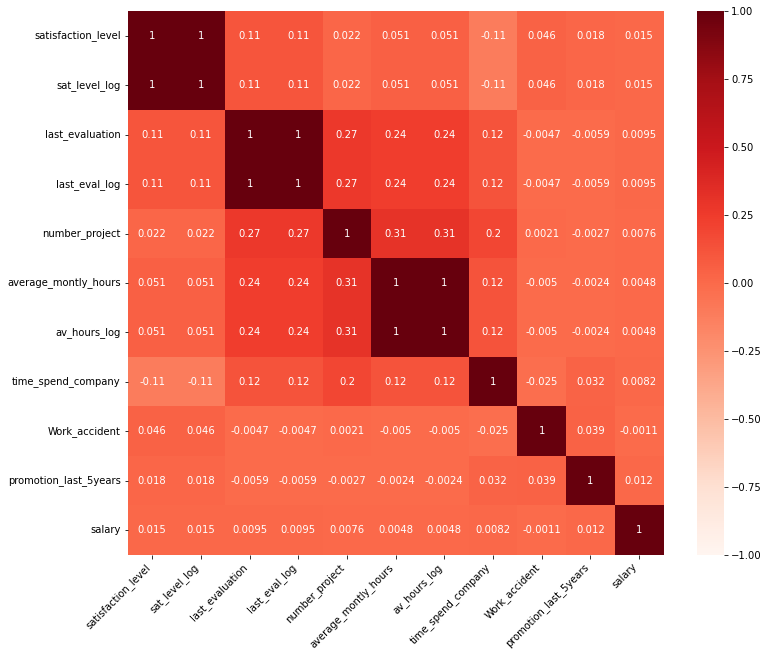

In [64]:
# Kendall Correlation matrix
plt.figure(figsize = (12,10))

cor = df_c.corr(method = 'kendall')

ax = sns.heatmap(cor, 
                 annot = True, 
                 vmin = -1, 
                 vmax = 1, 
                 center = 0, 
                 cmap = plt.cm.Reds) # cmap = sns.diverging_palette(20, 220, n = 200)

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation = 45,
                   horizontalalignment = 'right')

plt.show()

In [65]:
# наибольшая и наименьшая корреляция
c = df_c.corr(method = 'kendall').abs()
s = c.unstack()
so = s.sort_values(kind = 'quicksort')

In [66]:
print(so[-22:-17])

last_evaluation       number_project          0.266267
number_project        av_hours_log            0.306987
av_hours_log          number_project          0.306987
number_project        average_montly_hours    0.306987
average_montly_hours  number_project          0.306987
dtype: float64


Две самые высокие корреляции включают `number_project` и `average_montly_hours`, и `number_project` и `last_evaluation`. Однако корреляция слабо положительная.

In [67]:
print(so[:4])

salary          Work_accident     0.001077
Work_accident   salary            0.001077
number_project  Work_accident     0.002096
Work_accident   number_project    0.002096
dtype: float64


Две самые низкие корреляции включают `salary` и `Work_accident`, и `number_project` и `Work_accident`.

### Мультиколлинеарный анализ

In [68]:
import warnings
warnings.filterwarnings('ignore')

# Getting variables for which to compute VIF and adding intercept term
X = df[
    ['satisfaction_level',
    'last_eval_log',
    'number_project', 
    'average_montly_hours',
    'time_spend_company',
    'Work_accident',
    'promotion_last_5years'
    ]
  ]

X['Intercept'] = 1

In [69]:
X.head()

,satisfaction_level,last_eval_log,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Intercept
0,0.38,-0.634878,2,157,3,0,0,1
1,0.80,-0.150823,5,262,6,0,0,1
2,0.11,-0.127833,7,272,4,0,0,1
3,0.72,-0.139262,5,223,5,0,0,1
4,0.37,-0.653926,2,159,3,0,0,1


In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Compute and view VIF
vif = pd.DataFrame()
vif['variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# View results using print
print(vif)

               variables        VIF
0     satisfaction_level   1.067160
1          last_eval_log   1.246795
2         number_project   1.355188
3   average_montly_hours   1.281311
4     time_spend_company   1.058839
5          Work_accident   1.005208
6  promotion_last_5years   1.007573
7              Intercept  48.504410


Поскольку VIF ближе к 1, мы можем говорить об умеренной корреляции между независимыми переменными.

## Modelling

### Linear Discriminant Analysis (Линейный дискриминантный анализ)

In [71]:
# trying different features
df_model = df[
    ['satisfaction_level',
    'last_eval_log',
    'number_project', 
    'average_montly_hours',
    'time_spend_company',
    'Work_accident',
    'promotion_last_5years'
    ]
  ]

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_model, df['left'], test_size = 0.30, random_state = 42)

In [73]:
# масштабирование функции
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [74]:
# LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [75]:
# making prediction
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
# performance measurement
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7557777777777778

### Logistic Regression

In [77]:
# trying different features
df_model_2 = df[
    ['satisfaction_level',
    'last_eval_log',
    'number_project', 
    'average_montly_hours',
    'time_spend_company',
    'Work_accident',
    'promotion_last_5years'
    ]
  ]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(df_model_2, df['left'], test_size = 0.30, random_state = 42)

In [79]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [80]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [81]:
# performance measurement
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, lr.predict(X_test)))
print(accuracy_score(y_test, lr.predict(X_test)))

[[3160  268]
 [ 816  256]]
0.7591111111111111


### Random Forest Classifier

In [82]:
# trying different features
df_model_3 = df[
    ['satisfaction_level',
    'last_eval_log',
    'number_project', 
    'average_montly_hours',
    'time_spend_company',
    'Work_accident',
    'promotion_last_5years',
    'department',
    'salary'
    ]
  ]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(df_model_3, df['left'], test_size = 0.30, random_state = 42)

In [84]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [85]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [86]:
# test performance measurement
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[3418   10]
 [  95  977]]
0.9766666666666667


Попытка **выбора признаков** уменьшить дисперсию модели и, следовательно, переобучение.

In [87]:
feat_labels = ['satisfaction_level',
    'last_eval_log',
    'number_project', 
    'average_montly_hours',
    'time_spend_company',
    'Work_accident',
    'promotion_last_5years',
    'department',
    'salary'
    ]

In [88]:
# name and gini importance of each feature
for feature in zip(feat_labels, classifier.feature_importances_):
    print(feature)

('satisfaction_level', 0.33518238819427854)
('last_eval_log', 0.11467868669774808)
('number_project', 0.19991554815436824)
('average_montly_hours', 0.15054996293765044)
('time_spend_company', 0.1849053997672037)
('Work_accident', 0.0043681189902708825)
('promotion_last_5years', 0.0007858384076546757)
('department', 0.004841179779207061)
('salary', 0.004772877071618341)


In [89]:
# selector object that will use the random forest classifier to identify feature importance > 0.10
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(classifier, threshold = 0.10)

# training the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=9, n_jobs=-1,
                                                 random_state=42),
                threshold=0.1)

In [90]:
# names of the most important features
for feature_list_index in sfm.get_support(indices = True):
    print(feat_labels[feature_list_index])

satisfaction_level
last_eval_log
number_project
average_montly_hours
time_spend_company


In [91]:
# transforming the data to create a new dataset containing only the most important features
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [92]:
# new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1)

# new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [93]:
# applying the full featured classifier to the test data
y_important_pred = clf_important.predict(X_important_test)

# view the accuracy of limited feature model
accuracy_score(y_test, y_important_pred)

0.9886666666666667

## Вывод

В этом исследовании мы решили сравнить модели LDA, логистической регрессии и классификатора случайного леса. Поскольку данные сильно искажены, иногда бимодальны и включают категориальные переменные, модель классификатора случайного леса показала лучшие результаты с точностью 97,7%. Выбор важности признаков позволил повысить точность до 98,9% и одновременно снизить сложность модели.